### UVOD

        Motivacija za izbor ove teme je zapravo posao kojim se trenutno bavim (analiza podataka i strojno učenje za jednu tvrtku koja se bavi energetikom i automatizacijom). Ali ovu temu sam izabrao i zato što je sve veća potrebe za analizom i predviđanjem učinkovitosti toplinskih pumpi koje se koriste u industriji. Održavanje temperature ćelija unutar prihvatljivih granica ključno je za stabilan rad sustava i izbjegavanje potencijalnih kvarova. Analiza podataka o temperaturama, kao i predviđanje mogućih anomalija, omogućuju pravovremenu reakciju i poboljšavaju učinkovitost održavanja. Cilj ovog projekta bio je analizirati povijesne podatke o temperaturama ćelija, otkriti moguće obrasce i razviti predikcijski model koji će pomoći u identifikaciji rizika od pregrijavanja.

        Tin Barbarić
    Izjava o izvornosti
    Izjavljujem da je ovaj projekt izvorni rezultat mojeg rada te da se u izradi istoga nisam koristio
    drugim izvorima osim onima koji su u njemu navedeni. Za izradu rada su korištene etiˇcki
    prikladne i prihvatljive metode i tehnike rada.

In [2]:
import pandas as pd
import numpy as np

df2018 = pd.read_csv("Funtana CCR1 - 20180718.csv")
df2019 = pd.read_excel("Funtana CCR1 - 20190718.xlsx")
df2020 = pd.read_excel("Funtana CCR1 - 20200718.xlsx")

df2018

,Hour,S0,S1,S2,S3,S4,S5
0,00:00:54,54.8,50.4,49.8,49.4,50.6,47.5
1,00:01:54,54.1,50.2,49.6,49.4,50.7,47.5
2,00:02:54,54.2,50.5,49.9,49.3,50.4,47.3
3,00:03:54,54.6,50.5,50.0,49.2,50.4,47.3
4,00:04:54,55.0,50.5,49.9,49.2,50.4,47.3
...,...,...,...,...,...,...,...
1435,23:55:47,54.8,50.2,49.7,49.4,50.7,47.4
1436,23:56:47,54.9,50.8,50.2,49.2,50.3,47.1
1437,23:57:47,54.4,50.7,50.2,49.1,50.4,47.2
1438,23:58:47,54.3,50.7,49.9,49.3,50.5,47.4


In [3]:
df2019

,Hour,S0,S1,S2,S3,S4,S5
0,00:00:01,65.4,48.4,50.3,50.6,50.8,56.3
1,00:01:01,65.3,48.3,50.2,50.4,50.8,56.2
2,00:02:01,65.2,48.2,50.0,50.5,50.8,56.2
3,00:03:01,65.2,48.2,49.9,50.4,50.8,56.2
4,00:04:01,65.2,48.1,49.9,50.5,50.8,56.2
...,...,...,...,...,...,...,...
1435,23:55:30,54.3,44.7,44.4,47.6,45.1,45.4
1436,23:56:30,54.3,44.4,44.4,47.6,45.0,45.4
1437,23:57:30,54.3,44.5,44.3,47.4,45.1,45.5
1438,23:58:30,54.1,44.5,44.1,47.5,45.2,45.5


In [4]:
df2020

,Hour,S0,S1,S2,S3,S4,S5
0,00:00:30,60.0,50.1,43.8,47.4,49.4,40.0
1,00:01:30,59.7,49.7,43.3,47.1,49.1,39.9
2,00:02:30,59.6,49.2,43.1,46.9,48.8,39.9
3,00:03:30,59.3,49.2,43.2,46.6,48.7,39.6
4,00:04:30,59.4,48.7,42.9,46.3,48.3,39.3
...,...,...,...,...,...,...,...
1434,23:55:00,61.9,53.1,46.9,47.2,52.0,48.0
1435,23:56:00,61.7,53.5,46.8,47.7,51.9,48.0
1436,23:57:00,61.4,53.5,46.4,48.5,51.6,48.0
1437,23:58:00,61.9,53.5,46.1,49.5,51.4,48.0


In [5]:
df2018['Godina'] = 2018
df2019['Godina'] = 2019
df2020['Godina'] = 2020

df = pd.concat([df2018, df2019, df2020], ignore_index=True)
df

,Hour,S0,S1,S2,S3,S4,S5,Godina
0,00:00:54,54.8,50.4,49.8,49.4,50.6,47.5,2018
1,00:01:54,54.1,50.2,49.6,49.4,50.7,47.5,2018
2,00:02:54,54.2,50.5,49.9,49.3,50.4,47.3,2018
3,00:03:54,54.6,50.5,50.0,49.2,50.4,47.3,2018
4,00:04:54,55.0,50.5,49.9,49.2,50.4,47.3,2018
...,...,...,...,...,...,...,...,...
4314,23:55:00,61.9,53.1,46.9,47.2,52.0,48.0,2020
4315,23:56:00,61.7,53.5,46.8,47.7,51.9,48.0,2020
4316,23:57:00,61.4,53.5,46.4,48.5,51.6,48.0,2020
4317,23:58:00,61.9,53.5,46.1,49.5,51.4,48.0,2020


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319 entries, 0 to 4318
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hour    4319 non-null   object 
 1   S0      4319 non-null   float64
 2   S1      4319 non-null   float64
 3   S2      4319 non-null   float64
 4   S3      4319 non-null   float64
 5   S4      4319 non-null   float64
 6   S5      4319 non-null   float64
 7   Godina  4319 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 270.1+ KB


In [7]:
df.columns

Index(['Hour', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'Godina'], dtype='object')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

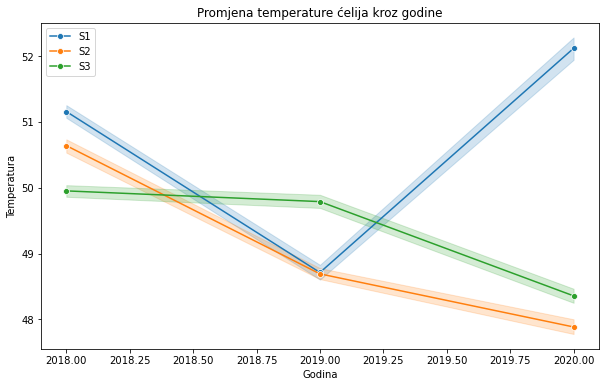

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Godina', y='S1', marker='o', label='S1')
sns.lineplot(data=df, x='Godina', y='S2', marker='o', label='S2')
sns.lineplot(data=df, x='Godina', y='S3', marker='o', label='S3')
plt.title('Promjena temperature ćelija kroz godine')
plt.xlabel('Godina')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

In [10]:
df.describe()

,S0,S1,S2,S3,S4,S5,Godina
count,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000
mean,59.889674,50.662260,49.072169,49.366404,49.730401,49.981848,2018.999768
std,4.161334,2.970098,2.216115,2.051555,2.208687,3.509684,0.816544
min,49.000000,37.200000,39.200000,44.800000,44.000000,38.500000,2018.000000
25%,56.600000,48.300000,47.700000,47.700000,48.000000,47.600000,2018.000000
50%,60.700000,51.900000,49.300000,49.800000,49.800000,48.800000,2019.000000
75%,62.500000,52.700000,50.900000,50.900000,51.600000,52.000000,2020.000000
max,66.800000,56.400000,53.400000,56.300000,56.300000,58.100000,2020.000000


In [11]:
print("Nedostajuće vrijednosti:")
print(df.isnull().sum())

Nedostajuće vrijednosti:
Hour      0
S0        0
S1        0
S2        0
S3        0
S4        0
S5        0
Godina    0
dtype: int64


### Čisti podaci

Kao što možemo vidjeti, nema null-vrijednosti jer su svi podaci koji su dobiveni od čipa toplinske pumpe popunjeni. Čip pumpe sprema podatke u svoju bazu podataka, za sad se pokazao iznimno efikasnim i točnim. 

In [12]:
threshold = 75 
anomalije = df[(df[['S1', 'S2', 'S3', 'S4', 'S5']] >= threshold).any(axis=1)]
print("Pregrijavanja ćelija:")
print(anomalije)

Pregrijavanja ćelija:
Empty DataFrame
Columns: [Hour, S0, S1, S2, S3, S4, S5, Godina]
Index: []


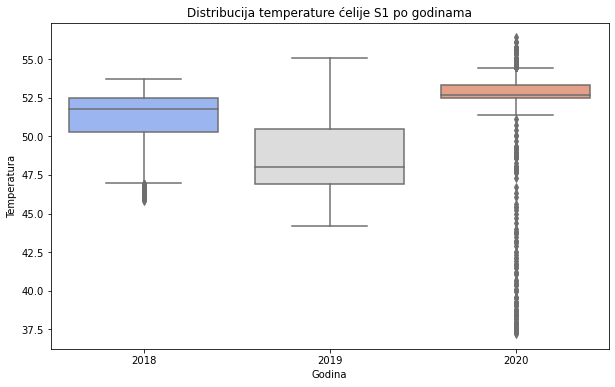

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Godina', y='S1', palette='coolwarm')
plt.title('Distribucija temperature ćelije S1 po godinama')
plt.xlabel('Godina')
plt.ylabel('Temperatura')
plt.show()

In [14]:
print("Korelacija između ćelija:")
print(df[['S1', 'S2', 'S3']].corr())

Korelacija između ćelija:
          S1        S2        S3
S1  1.000000  0.269816  0.091258
S2  0.269816  1.000000  0.516215
S3  0.091258  0.516215  1.000000


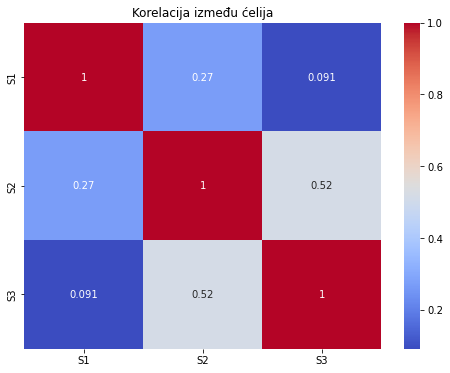

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['S1', 'S2', 'S3']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelacija između ćelija')
plt.show()

In [16]:
df.columns

Index(['Hour', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'Godina'], dtype='object')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

cell_predictions = {}

for column in ['S0', 'S1', 'S2', 'S3', 'S4', 'S5']:
    X = df['Godina'].values.reshape(-1, 1) 
    y = df[column].values 

    model = LinearRegression()
    model.fit(X, y)

    target_temp = 75
    predicted_year = (target_temp - model.intercept_) / model.coef_[0]

    cell_predictions[column] = predicted_year

In [18]:
for cell, year in cell_predictions.items():
    print(f"Ćelija {cell} će doseći 75°C oko godine: {year:.2f}")

Ćelija S0 će doseći 75°C oko godine: 2024.09
Ćelija S1 će doseći 75°C oko godine: 2069.71
Ćelija S2 će doseći 75°C oko godine: 2000.18
Ćelija S3 će doseći 75°C oko godine: 1986.85
Ćelija S4 će doseći 75°C oko godine: 1999.72
Ćelija S5 će doseći 75°C oko godine: 2513.08


In [19]:
anomalije = df[(df[['S0', 'S1', 'S2', 'S3', 'S4', 'S5']] >= 75).any(axis=1)]

if not anomalije.empty:
    print("Već postoje pregrijavanja u sljedećim redovima:")
    print(anomalije)
else:
    print("Nema trenutnih pregrijavanja; predviđanja su prikazana gore.")

Nema trenutnih pregrijavanja; predviđanja su prikazana gore.


## Objašnjenje predviđanja

Dakle kroz analizu ovih podataka i predviđanje linearnom regresijom vidimo da će do pregrijavanja doći 2024 godine, što je apsolutno točno, jer smo prije ovog ljeta (u firmi) čistili ćelije od kamenca kako bi spriječili pregrijavanje prve ćelije. Daljnje analize za S1, S2 i ostale ćelije nisu suviše točne jer bi za njih trebali analizirati puno veće skupove podatka, što i radimo kada su bitnije i relevantnije analize u pitanju (pregledavamo podatke svake minute kroz cijelu sezonu). 

## Spremanje u bazu

In [20]:
from sqlalchemy import create_engine
import pymysql


user = 'root'  
password = ''  
host = 'localhost'  
database = 'pzap_projekt'  

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")

df.to_sql('funtana_podaci', con=engine, if_exists='replace', index=False)

4319

In [21]:
df

,Hour,S0,S1,S2,S3,S4,S5,Godina
0,00:00:54,54.8,50.4,49.8,49.4,50.6,47.5,2018
1,00:01:54,54.1,50.2,49.6,49.4,50.7,47.5,2018
2,00:02:54,54.2,50.5,49.9,49.3,50.4,47.3,2018
3,00:03:54,54.6,50.5,50.0,49.2,50.4,47.3,2018
4,00:04:54,55.0,50.5,49.9,49.2,50.4,47.3,2018
...,...,...,...,...,...,...,...,...
4314,23:55:00,61.9,53.1,46.9,47.2,52.0,48.0,2020
4315,23:56:00,61.7,53.5,46.8,47.7,51.9,48.0,2020
4316,23:57:00,61.4,53.5,46.4,48.5,51.6,48.0,2020
4317,23:58:00,61.9,53.5,46.1,49.5,51.4,48.0,2020


In [27]:
from flask import Flask, jsonify, request, Response

app = Flask(__name__)


cell_predictions = {
    'S0': 2024.09,
    'S1': 2069.71,
    'S2': 2000.18,
    'S3': 1986.85,
    'S4': 1999.72,
    'S5': 2513.08
}


@app.route('/')
def home():
    return "API for Data Analysis and Predictions"

@app.route('/data', methods=['GET'])
def get_data():
    formatted_df = df.copy()
    formatted_df['Hour'] = formatted_df['Hour'].astype(str)  
    return jsonify(formatted_df.to_dict(orient='records'))  

@app.route('/data/year/<int:year>', methods=['GET'])
def get_data_by_year(year):
    filtered_data = df[df['Godina'] == year]
    if filtered_data.empty:
        return jsonify({"error": f"Nema podataka za godinu {year}"}), 404
    formatted_data = filtered_data.copy()
    formatted_data['Hour'] = formatted_data['Hour'].astype(str)
    return jsonify(formatted_data.to_dict(orient='records'))

@app.route('/predictions', methods=['GET'])
def get_predictions():
    return jsonify(cell_predictions)

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 5000, app, use_reloader=False)

 * Running on http://localhost:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Jan/2025 08:32:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2025 08:32:37] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [19/Jan/2025 08:32:41] "GET /data HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2025 08:33:18] "GET /data/year/2020 HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2025 08:33:49] "GET /predictions HTTP/1.1" 200 -
127.0.0.1 - - [19/Jan/2025 08:33:49] "GET /favicon.ico HTTP/1.1" 404 -


### Opis implementacije

        Podaci za analizu dolaze iz tvrtke u kojoj trenutno radim, s ovim podacima smo radili prije godinu dana kako bi predvidjeli sljedeće pregrijavanje koje bi se zasigurno desilo na ljeto 2024. Tako da je naše predviđanje pregrijavanja ćelije S1 zapravo stvorilo veliku uštedu za našeg poslodavca i za nas same. Za ovaj projekt uzeo sam 3 različite godine (2018., 2019. i 2020.) na 3 ista datuma, te su učitane u formatu CSV i Excel datoteka. Svaki skup podataka sadrži temperature nekoliko ćelija (S0 do S5) tijekom dana, zabilježene svakih nekoliko minuta. Nakon učitavanja podataka pomoću biblioteka pandas i numpy, podaci su objedinjeni u jedan DataFrame kako bi se omogućila analiza višegodišnjih trendova.

        Za vizualizaciju su korištene biblioteke matplotlib i seaborn. Prikazani su trendovi promjena temperatura za pojedine ćelije kroz godine, kao i distribucija temperatura pojedinih ćelija. Također, izračunata je korelacija između ćelija kako bi se uočila međusobna povezanost temperaturnih vrijednosti.

        Osim analize postojećih podataka, korištena je linearna regresija iz kolegija "Uvod u umjetnu inteligenciju" za predviđanje trenutka kada bi temperature mogle dosegnuti kritičnu razinu (75°C). Ova predikcija napravljena je uz pomoć biblioteke scikit-learn. Rezultati su pohranjeni u MySQL bazu podataka (koju smo podigli pomoću XAMPP kontrolnog panela i Apache servera, a izrađena je u MqSql Workbenchu) koristeći SQLAlchemy, čime je omogućeno dugoročno čuvanje i pristup podacima.

### Kritički osvrt

        Praktična izvedivost ove analize pokazala se vrlo korisnom za preventivno održavanje sustava toplinskih pumpi. Pravovremeno predviđanje pregrijavanja omogućuje donošenje proaktivnih odluka koje mogu spriječiti kvarove i smanjiti troškove održavanja. Ipak, ograničenost dostupnih podataka (samo tri godine i intervali prikupljanja podataka) utječe na točnost predikcija, posebno za ćelije koje pokazuju stabilnije temperaturne vrijednosti.

        Za preciznija predviđanja bilo bi potrebno proširiti vremenski period analize te povećati frekvenciju prikupljanja podataka. Također, dodatne varijable (poput okolišnih uvjeta i opterećenja sustava) mogle bi značajno unaprijediti analitičke modele. Unatoč tim ograničenjima, implementirani sustav pruža korisne uvide i potvrđuje svoju praktičnu primjenjivost.

### Prikaz rada aplikacije

        Aplikacija je omogućila vizualizaciju promjena temperatura kroz godine, distribuciju temperaturnih vrijednosti i identifikaciju mogućih pregrijavanja. Na primjer, prikaz linijskog grafa jasno pokazuje kako se temperature pojedinih ćelija mijenjaju kroz vrijeme, dok boxplot vizualizacija daje uvid u raspon i medijane temperatura po godinama.

        Linearni regresijski model predvidio je da će prva ćelija (S0) dosegnuti kritičnu razinu temperature već 2024. godine. Ovo je u skladu s prethodnim iskustvima, jer su u firmi provedeni radovi na čišćenju ćelija kako bi se spriječilo pregrijavanje. Za ostale ćelije predikcije nisu bile toliko precizne zbog ograničenosti skupa podataka, no rezultati pokazuju potrebu za daljnjim praćenjem i analizom.

        Aplikacija je detektirala da trenutno nema podataka o pregrijavanju, što dodatno potvrđuje da su mjere održavanja bile uspješne. Sve prikupljene i obrađene podatke aplikacija pohranjuje u MySQL bazu podataka, čime se osigurava trajna dostupnost za buduće analize.
        
        Dolje možemo divjeti i neke slike (phpMyAdmin sučelja, XAMPP panela, SQL koda za bazu podataka)

![phpMyAdmin](img/admin_php.png)

![xampp](img/xampp.png)

![title1](img/sql_kod.png)

        Nakon svega odlučio sam još podići i REST API straincu koja predstavlja jedno interaktivno sučelje preko kojeg korisnik može doći do određenih podataka poput: /data (prikazuje dataframe), /predictions (prikazuje predviđanja do kojih smo došli) i /data/year/2018 (prikazuje dataframe za određenu godinu koju korisnik može odabrati). A dolje je i nekoliko slika nevedenog REST API-ja...

![title2](img/rest1.png)

![title](img/rest2.png)

![title](img/rest3.png)

### Zaključak

        Provedena analiza i implementacija demonstrirale su važnost sustavnog praćenja i predikcije u radu toplinskih pumpi. Kombiniranjem povijesnih podataka, analitičkih metoda i strojnog učenja omogućeno je rano prepoznavanje rizika, što smanjuje potencijalne gubitke i osigurava pouzdan rad sustava. Ova aplikacija predstavlja temelj za daljnji razvoj sustava nadzora i predikcije koji bi se mogao proširiti na složenije sustave i veće podatkovne skupove.

### Literatura

## Literatura

1. **Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011).** *Scikit-learn: Machine learning in Python*. Journal of Machine Learning Research, 12, 2825-2830.  

2. **Waskom, M. L. (2021).** *Seaborn: statistical data visualization*. Journal of Open Source Software, 6(60), 3021.  

3. **Pérez, F., & Granger, B. E. (2007).** *IPython: A System for Interactive Scientific Computing*. Computing in Science & Engineering, 9(3), 21-29.  

4. **McKinney, W. (2018)** *Python for Data Analysis*, O'Reilly, USA.